<a href="https://colab.research.google.com/github/marcostrivelato/Imers-o-de-Dados/blob/main/Imersao_Dados_4_Aula_2_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Aula 2

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers



In [145]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [146]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [147]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [148]:
dados[['Moeda','Valor','Tipo']] = dados['Valor'].str.split(expand = True)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,R$,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,R$,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,R$,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000,R$,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,R$,None


In [149]:
dados['Valor'] = dados["Valor"].str.replace(".","").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [150]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,R$,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,R$,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,R$,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,R$,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,R$,None


In [151]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  int64 
 8   Moeda      10008 non-null  object
 9   Tipo       852 non-null    object
dtypes: int64(5), object(5)
memory usage: 782.0+ KB


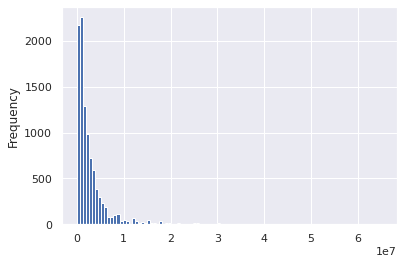

In [152]:
dados["Valor"].plot.hist(bins=100)


## **Gráfico com as labels ajustadas e escala em milhões de reais**

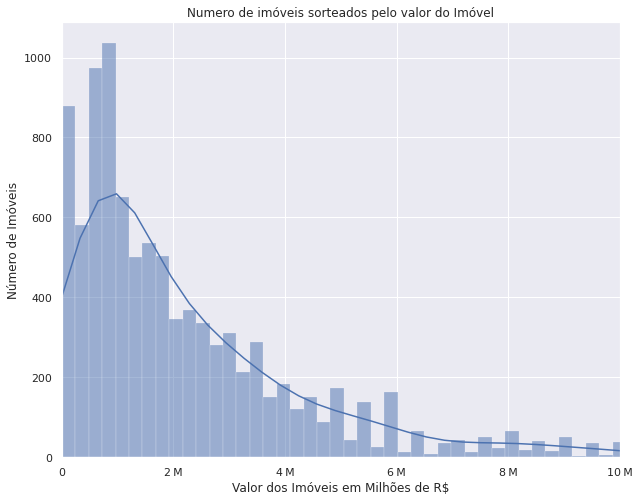

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

sns.set()
plt.figure(figsize=(10, 8))
graph = sns.histplot(data = dados, x = "Valor", kde = True)
graph.set_title("Numero de imóveis sorteados pelo valor do Imóvel")
graph.set_ylabel("Número de Imóveis")
graph.set_xlabel("Valor dos Imóveis em Milhões de R$")

formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
graph.xaxis.set_major_formatter(formatter1)

plt.xlim((-1, 10000000))
plt.show()

In [154]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Tipo
5047,NaN,Vila Carrão,São Paulo,350,3,3,8,1200000,R$,None
1415,NaN,Cidade Monções,São Paulo,120,2,2,2,970000,R$,None
5248,"Rua Ribeiro do Vale, 1163",Brooklin,São Paulo,225,3,3,3,1800000,R$,None
3336,NaN,Jardim Everest,São Paulo,500,4,8,6,20000,R$,/Mês
1734,NaN,Jardim América,São Paulo,379,5,5,4,7000000,R$,None
7891,Avenida Piassanguaba,Planalto Paulista,São Paulo,190,3,4,1,650000,R$,None
4592,NaN,Jardim América,São Paulo,705,5,8,6,14500000,R$,None
9249,NaN,Vila Marieta,São Paulo,149,2,2,2,430000,R$,None
9760,NaN,Jardim Europa,São Paulo,580,3,5,3,5200000,R$,None
6234,Rua da Paz,Alto da Boa Vista,São Paulo,595,4,7,4,3200000,R$,None


In [155]:
dados_vendas = dados[dados["Tipo"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,R$,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,R$,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,R$,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000,R$,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,R$,None
...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000,R$,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000,R$,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000,R$,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000,R$,None


In [156]:
dados_vendas["Tipo"].unique()

array([None], dtype=object)

In [157]:
dados_bairro = dados_vendas.groupby('Bairro').mean()

dados_bairro.sample(10)

,Metragem,Quartos,Banheiros,Vagas,Valor
Bairro,,,,,
Vila Nova Manchester,310.5,2.0,1.0,1.0,1100000.0
Mirandópolis,180.8,3.0,2.6,2.6,1171073.2
Retiro Morumbi,1136.4,4.7,7.7,9.7,12002608.7
Vila Amélia,275.5,3.0,2.0,2.0,690000.0
Alto de Pinheiros,429.9,3.9,4.8,5.0,4782699.0
Jardim da Glória,578.9,3.3,3.3,3.5,1584471.9
Jardim Umarizal,212.5,3.0,2.0,2.0,954000.0
Parque Boturussu,146.2,2.6,2.0,3.0,344200.0
Parque Maria Domitila,150.0,3.0,1.0,1.0,490000.0


In [158]:
dados_bairro['Valor por Metro'] = dados_bairro['Valor']/dados_bairro['Metragem']

In [159]:
dados_bairro.head()

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor por Metro
Bairro,,,,,,
Aclimação,246.2,3.3,3.0,2.9,1763200.0,7162.7
Alto da Boa Vista,418.9,4.1,5.1,4.6,2391250.0,5708.7
Alto da Lapa,299.2,3.1,3.9,4.0,2083168.8,6961.3
Alto da Mooca,270.1,3.3,2.6,3.6,1184170.0,4385.0
Alto de Pinheiros,429.9,3.9,4.8,5.0,4782699.0,11126.3


In [160]:
dados_bairro.sort_values(by=['Valor por Metro'], ascending=False).head(15)

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor por Metro
Bairro,,,,,,
Vila Guaca,10.0,3.0,2.0,2.0,800000.0,80000.0
Jardim América,646.3,4.0,5.1,7.1,16427596.6,25417.5
Jardim Teresa,648.3,5.0,6.0,6.0,14836666.7,22884.3
Jardim Europa,566.2,3.8,4.7,5.0,11496061.4,20304.6
Vila Nova Conceição,299.3,3.0,3.4,3.2,5260914.0,17576.1
Morro dos Ingleses,466.7,4.0,3.3,8.7,8100000.0,17357.1
Jardim Luzitânia,499.1,3.5,4.9,4.3,8465344.8,16961.1
Jardim Paulista,489.8,3.9,4.6,4.4,8030379.7,16395.7
Jardim Paulistano,384.1,3.7,4.0,3.9,5728134.3,14913.5


Para analizar os quartis, mediana e outliers do valor por metro quadrado podemos usar o describe

In [161]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

dados_bairro['Valor por Metro'].describe()

count     697.0
mean     4929.7
std      3877.0
min        78.4
25%      3255.8
50%      4363.6
75%      5708.7
max     80000.0
Name: Valor por Metro, dtype: float64

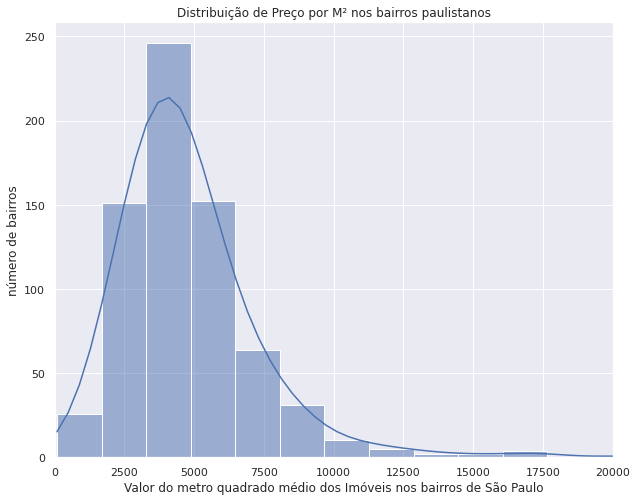

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

sns.set()
plt.figure(figsize=(10, 8))
graph = sns.histplot(data = dados_bairro, x = "Valor por Metro", kde = True, bins=50)
graph.set_title("Distribuição de Preço por M² nos bairros paulistanos")
graph.set_ylabel("número de bairros")
graph.set_xlabel("Valor do metro quadrado médio dos Imóveis nos bairros de São Paulo")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

plt.xlim((-1, 20000))
plt.show()

In [163]:
dados_bairro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, Aclimação to Água Rasa
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Metragem         697 non-null    float64
 1   Quartos          697 non-null    float64
 2   Banheiros        697 non-null    float64
 3   Vagas            697 non-null    float64
 4   Valor            697 non-null    float64
 5   Valor por Metro  697 non-null    float64
dtypes: float64(6)
memory usage: 38.1+ KB


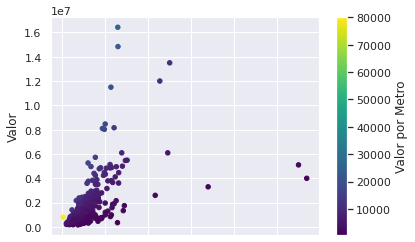

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

sns.set()
# plt.figure(figsize=(20, 15))
graph = dados_bairro.plot.scatter(x='Metragem', y='Valor', c='Valor por Metro', colormap='viridis')
# graph.set_title("Distribuição de Preço por M² nos bairros paulistanos")}
# graph.set_ylabel("número de bairros")
graph.set_xlabel("Valor do metro quadrado médio dos Imóveis nos bairros de São Paulo")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

# plt.xlim((-1, 20000))
plt.show()

O gráfico acima mostra que temos um outlier evidente, portanto limparemos os dados para remover este outlier e então replotar o gráfico

In [165]:
dados_bairro.sort_values(by = ['Metragem'])

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor por Metro
Bairro,,,,,,
Vila Guaca,10.0,3.0,2.0,2.0,800000.0,80000.0
Vila Leonor,46.0,2.0,2.0,1.0,290000.0,6304.3
Jardim Benfica,48.0,2.0,1.0,1.0,199900.0,4164.6
Jardim Nova Germania,57.0,3.0,1.0,5.0,350000.0,6140.4
Cidade Antônio Estevão de Carvalho,57.5,2.0,1.0,1.0,320000.0,5565.2
...,...,...,...,...,...,...
Chácara Flora,1251.4,4.8,6.2,6.9,13500000.0,10787.5
Jardim das Camélias,1700.0,4.0,7.0,13.0,3300000.0,1941.2
Jardim Guedala,2754.1,4.1,5.7,6.1,5102452.1,1852.6


In [166]:
dados_bairro.drop(["Sítio Represa"], inplace= True)
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor por Metro
Bairro,,,,,,
Aclimação,246.2,3.3,3.0,2.9,1763200.0,7162.7
Alto da Boa Vista,418.9,4.1,5.1,4.6,2391250.0,5708.7
Alto da Lapa,299.2,3.1,3.9,4.0,2083168.8,6961.3
Alto da Mooca,270.1,3.3,2.6,3.6,1184170.0,4385.0
Alto de Pinheiros,429.9,3.9,4.8,5.0,4782699.0,11126.3
...,...,...,...,...,...,...
Vila Água Funda,152.2,2.6,2.2,2.6,652000.0,4283.8
Água Branca,173.6,3.1,3.2,2.2,1226500.0,7065.8
Água Fria,165.4,2.8,3.4,2.5,927083.3,5604.5


In [167]:
dados_bairro.sort_values(by = ["Metragem"])

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor por Metro
Bairro,,,,,,
Vila Guaca,10.0,3.0,2.0,2.0,800000.0,80000.0
Vila Leonor,46.0,2.0,2.0,1.0,290000.0,6304.3
Jardim Benfica,48.0,2.0,1.0,1.0,199900.0,4164.6
Jardim Nova Germania,57.0,3.0,1.0,5.0,350000.0,6140.4
Cidade Antônio Estevão de Carvalho,57.5,2.0,1.0,1.0,320000.0,5565.2
...,...,...,...,...,...,...
Jardim Sílvia (Zona Oeste),1229.0,4.3,5.7,7.9,6094074.1,4958.7
Chácara Flora,1251.4,4.8,6.2,6.9,13500000.0,10787.5
Jardim das Camélias,1700.0,4.0,7.0,13.0,3300000.0,1941.2


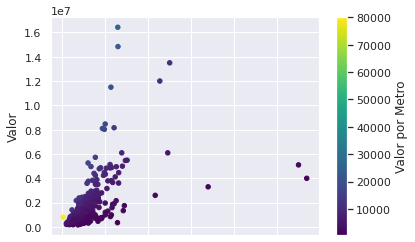

In [168]:
from seaborn.relational import lineplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from scipy.optimize import curve_fit

sns.set()
# plt.figure(figsize=(20, 15))
graph = dados_bairro.plot.scatter(x='Metragem', y='Valor', c='Valor por Metro', colormap='viridis')
# graph.set_title("Distribuição de Preço por M² nos bairros paulistanos")}
# graph.set_ylabel("número de bairros")
graph.set_xlabel("Valor do metro quadrado médio dos Imóveis nos bairros de São Paulo")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

# plt.xlim((-1, 20000))
plt.show()

In [ ]:
from matplotlib.rcsetup import validate_color_or_auto
Com este gráfico podemos observar que há bairros com o valor médio por metro abaixo de uma linha média, e outros acima. Caso a análise seja focada em compra e venda de
imóveis para rentabilidade, seria melhor observar os gráficos abiaxo da médis. Já para fornecimento de crédito os bairros acima da média terão imóveis com melhor valor
para garantia quando fornecer crédito.